#Music - Genre classification system using Machine learning

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Dataset
'tracks.csv' : all 106,574 tracks' ID, title, artist, genres, tags, and play counts, as well as other track-specific information.

'genres.csv' : all 163 genres with names and their parents (used to deduce the top-level genres and the genre hierarchy).

'echonest.csv' : For a subset of 13,129 tracks, Echonest (now Spotify) supplied audio features.

In [2]:
tracks_data = pd.read_csv('tracks.csv', index_col=0, header=[0, 1])
genres_data = pd.read_csv('genres.csv')
echonest_data = pd.read_csv('echonest.csv', index_col=0, header=[0, 1])

#Tracks Data

In [3]:
tracks_data.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [4]:
tracks_data.isna().sum()

album   comments                  0
        date_created           3529
        date_released         36280
        engineer              91279
        favorites                 0
        id                        0
        information           23425
        listens                   0
        producer              88514
        tags                      0
        title                  1025
        tracks                    0
        type                   6508
artist  active_year_begin     83863
        active_year_end      101199
        associated_labels     92303
        bio                   35418
        comments                  0
        date_created            856
        favorites                 0
        id                        0
        latitude              62030
        location              36364
        longitude             62030
        members               59725
        name                      0
        related_projects      93422
        tags                

In [5]:
tracks_data.describe()

album                                              \
            comments      favorites             id       listens   
count  106574.000000  106574.000000  106574.000000  1.065740e+05   
mean        0.394946       1.286927   12826.933914  3.212031e+04   
std         2.268915       3.133035    6290.261805  1.478532e+05   
min        -1.000000      -1.000000      -1.000000 -1.000000e+00   
25%         0.000000       0.000000    7793.000000  3.361000e+03   
50%         0.000000       0.000000   13374.000000  8.982000e+03   
75%         0.000000       1.000000   18203.000000  2.363500e+04   
max        53.000000      61.000000   22940.000000  3.564243e+06   

                             artist                                \
              tracks       comments      favorites             id   
count  106574.000000  106574.000000  106574.000000  106574.000000   
mean       19.721452       1.894702      30.041915   12036.770404   
std        39.943673       6.297679     100.511408    6881.420867   
min        -1.000000      -1.000000      -1.000000       1.000000   
25%         7.000000       0.000000       1.000000    6443.000000   
50%        11.000000       0.000000       5.000000   12029.500000   
75%        17.000000       1.000000      16.000000   18011.000000   
max       652.000000      79.000000     963.000000   24357.000000   

                                           track                 \
           latitude     longitude       bit_rate       comments   
count  44544.000000  44544.000000  106574.000000  106574.000000   
mean      39.901626    -38.668642  263274.695048       0.031621   
std       18.240860     65.237220   67623.443584       0.321993   
min      -45.878760   -157.526855      -1.000000       0.000000   
25%       39.271398    -79.997459  192000.000000       0.000000   
50%       41.387917    -73.554431  299914.000000       0.000000   
75%       48.856930      4.351710  320000.000000       0.000000   
max       67.286005    175.277000  448000.000000      37.000000   

                                                                  \
            duration      favorites      interest        listens   
count  106574.000000  106574.000000  1.065740e+05  106574.000000   
mean      277.849100       3.182521  3.541310e+03    2329.353548   
std       305.518553      13.513820  1.901743e+04    8028.070647   
min         0.000000       0.000000  2.000000e+00       0.000000   
25%       149.000000       0.000000  5.990000e+02     292.000000   
50%       216.000000       1.000000  1.314000e+03     764.000000   
75%       305.000000       3.000000  3.059000e+03    2018.000000   
max     18350.000000    1482.000000  3.293557e+06  543252.000000   

                      
              number  
count  106574.000000  
mean        8.260945  
std        15.243271  
min         0.000000  
25%         2.000000  
50%         5.000000  
75%         9.000000  
max       255.000000

#Genres Data

In [6]:
genres_data.head()

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


In [7]:
genres_data.isna().sum()

genre_id     0
#tracks      0
parent       0
title        0
top_level    0
dtype: int64

In [8]:
genres_data.describe()

,genre_id,#tracks,parent,top_level
count,163.000000,163.000000,163.000000,163.000000
mean,254.116564,2142.085890,60.447853,51.374233
std,265.048642,5199.542574,185.396011,211.470836
min,1.000000,0.000000,0.000000,2.000000
25%,60.500000,125.000000,5.000000,5.000000
50%,172.000000,563.000000,15.000000,12.000000
75%,400.500000,1846.500000,38.000000,20.000000
max,1235.000000,38154.000000,1235.000000,1235.000000


#Echonest Data

In [9]:
echonest_data.head()

echonest                                                      \
         audio_features audio_features.1 audio_features.2  audio_features.3   
NaN        acousticness     danceability           energy  instrumentalness   
track_id            NaN              NaN              NaN               NaN   
2          0.4166752327     0.6758939853     0.6344762684      0.0106280683   
3          0.3744077685     0.5286430621     0.8174611317      0.0018511032   
5          0.0435668989     0.7455658702     0.7014699916      0.0006967990   

                                                                              \
         audio_features.4 audio_features.5 audio_features.6 audio_features.7   
NaN              liveness      speechiness            tempo          valence   
track_id              NaN              NaN              NaN              NaN   
2            0.1776465712     0.1593100648   165.9220000000     0.5766609880   
3            0.1058799438     0.4618181276   126.9570000000     0.2692402421   
5            0.3731433124     0.1245953419   100.2600000000     0.6216612236   

                                  ...                        \
            metadata  metadata.1  ... temporal_features.214   
NaN       album_date  album_name  ...            214.000000   
track_id         NaN         NaN  ...                   NaN   
2                NaN         NaN  ...             -1.992303   
3                NaN         NaN  ...             -1.582331   
5                NaN         NaN  ...             -2.288358   

                                                                            \
         temporal_features.215 temporal_features.216 temporal_features.217   
NaN                 215.000000            216.000000            217.000000   
track_id                   NaN                   NaN                   NaN   
2                     6.805694              0.233070              0.192880   
3                     8.889308              0.258464              0.220905   
5                    11.527109              0.256821              0.237820   

                                                                            \
         temporal_features.218 temporal_features.219 temporal_features.220   
NaN                 218.000000             219.00000             220.00000   
track_id                   NaN                   NaN                   NaN   
2                     0.027455               0.06408               3.67696   
3                     0.081368               0.06413               6.08277   
5                     0.060122               0.06014               5.92649   

                                                                            
         temporal_features.221 temporal_features.222 temporal_features.223  
NaN                  221.00000            222.000000            223.000000  
track_id                   NaN                   NaN                   NaN  
2                      3.61288             13.316690            262.929749  
3                      6.01864             16.673548            325.581085  
5                      5.86635             16.013849            356.755737  

[5 rows x 249 columns]

In [10]:
echonest_data.columns

MultiIndex([('echonest',        'audio_features'),
            ('echonest',      'audio_features.1'),
            ('echonest',      'audio_features.2'),
            ('echonest',      'audio_features.3'),
            ('echonest',      'audio_features.4'),
            ('echonest',      'audio_features.5'),
            ('echonest',      'audio_features.6'),
            ('echonest',      'audio_features.7'),
            ('echonest',              'metadata'),
            ('echonest',            'metadata.1'),
            ...
            ('echonest', 'temporal_features.214'),
            ('echonest', 'temporal_features.215'),
            ('echonest', 'temporal_features.216'),
            ('echonest', 'temporal_features.217'),
            ('echonest', 'temporal_features.218'),
            ('echonest', 'temporal_features.219'),
            ('echonest', 'temporal_features.220'),
            ('echonest', 'temporal_features.221'),
            ('echonest', 'temporal_features.222'),
            ('e

In [11]:
echonest_data.isna().sum()

echonest  audio_features           1
          audio_features.1         1
          audio_features.2         1
          audio_features.3         1
          audio_features.4         1
                                  ..
          temporal_features.219    1
          temporal_features.220    1
          temporal_features.221    1
          temporal_features.222    1
          temporal_features.223    1
Length: 249, dtype: int64

In [12]:
echonest_data.describe()

echonest                                          \
      temporal_features temporal_features.1 temporal_features.2   
count      13130.000000        13130.000000        13130.000000   
mean           0.448322            0.435914            0.365330   
std            0.164849            0.166499            0.133245   
min            0.000000            0.020016            0.015092   
25%            0.332281            0.316450            0.275175   
50%            0.445554            0.432219            0.356016   
75%            0.560122            0.551590            0.442910   
max            0.998426            1.000000            2.000000   

                                                                   \
      temporal_features.3 temporal_features.4 temporal_features.5   
count        13130.000000        13130.000000        13130.000000   
mean             0.306272            0.365795            0.326088   
std              0.121098            0.143048            0.131318   
min              0.014307            0.032791            0.014088   
25%              0.224439            0.268242            0.238669   
50%              0.297742            0.352980            0.318933   
75%              0.376445            0.448602            0.401963   
max              3.000000            4.000000            5.000000   

                                                                   \
      temporal_features.6 temporal_features.7 temporal_features.8   
count        13130.000000        13130.000000        13130.000000   
mean             0.332840            0.358464            0.322465   
std              0.133663            0.143493            0.140416   
min              0.011858            0.011821            0.015987   
25%              0.246158            0.266234            0.235403   
50%              0.325462            0.349883            0.313062   
75%              0.408891            0.436423            0.397813   
max              6.000000            7.000000            8.000000   

                           ...                                              \
      temporal_features.9  ... temporal_features.214 temporal_features.215   
count        13130.000000  ...          13130.000000          13130.000000   
mean             0.358935  ...             -1.949554             10.761507   
std              0.154252  ...              2.543819             20.131455   
min              0.006663  ...            -17.966162             -1.867880   
25%              0.266043  ...             -2.587302              1.229507   
50%              0.348010  ...             -1.565089              4.355798   
75%              0.437750  ...             -0.874871             11.409532   
max              9.000000  ...            214.000000            423.621094   

                                                                         \
      temporal_features.216 temporal_features.217 temporal_features.218   
count          13130.000000          13130.000000          13130.000000   
mean               0.325411              0.271888              0.180467   
std                1.887558              1.893394              3.968928   
min                0.129023              0.098280              0.000518   
25%                0.242371              0.208750              0.021322   
50%                0.286022              0.242757              0.042150   
75%                0.339102              0.285309              0.087523   
max              216.000000            217.000000            375.744781   

                                                                         \
      temporal_features.219 temporal_features.220 temporal_features.221   
count          13130.000000          13130.000000          13130.000000   
mean               0.085200              4.199865              4.131420   
std                1.910658              5.312377              5.315244   
min                0.060000              0.322180      

#Column refining

**Save** the necessary columns and **Drop** Unneccessary columns 

In [13]:
tracks_data = tracks_data[[('album','date_created'), ('album','date_released'), ('album', 'title'), ('album', 'id'), ('artist', 'id'), ('artist', 'name'),  ('track', 'genre_top'), ('track', 'genres_all'),('track', 'title'), ('track', 'duration')]]

In [14]:
echonest_data = echonest_data[[('echonest','audio_features'), ('echonest','audio_features.1'), ('echonest','audio_features.2'), ('echonest','audio_features.3'), ('echonest','audio_features.4'), ('echonest','audio_features.5'), ('echonest','audio_features.6'), ('echonest','audio_features.7')]]
echonest_data.columns

MultiIndex([('echonest',   'audio_features'),
            ('echonest', 'audio_features.1'),
            ('echonest', 'audio_features.2'),
            ('echonest', 'audio_features.3'),
            ('echonest', 'audio_features.4'),
            ('echonest', 'audio_features.5'),
            ('echonest', 'audio_features.6'),
            ('echonest', 'audio_features.7')],
           )

We will **remove** the multi-indexing and **Rename** the columns

In [15]:
tracks_data.columns = tracks_data.columns.droplevel()
tracks_data.columns = ['date_created', 'date_released', 'album', 'album_id', 'artist_id', 'artist', 'genres_top', 'genres_all', 'track', 'duration']
tracks_data.columns

Index(['date_created', 'date_released', 'album', 'album_id', 'artist_id',
       'artist', 'genres_top', 'genres_all', 'track', 'duration'],
      dtype='object')

In [16]:
tracks_data.head()

,date_created,date_released,album,album_id,artist_id,artist,genres_top,genres_all,track,duration
track_id,,,,,,,,,,
2,2008-11-26 01:44:45,2009-01-05 00:00:00,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],Food,168
3,2008-11-26 01:44:45,2009-01-05 00:00:00,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],Electric Ave,237
5,2008-11-26 01:44:45,2009-01-05 00:00:00,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],This World,206
10,2008-11-26 01:45:08,2008-02-06 00:00:00,Constant Hitmaker,6,6,Kurt Vile,Pop,[10],Freeway,161
20,2008-11-26 01:45:05,2009-01-06 00:00:00,Niris,4,4,Nicky Cook,NaN,"[17, 10, 76, 103]",Spiritual Level,311


In [17]:
echonest_data.columns = echonest_data.columns.droplevel() 
echonest_data.rename(columns=echonest_data.iloc[0], inplace=True)
echonest_data.drop(echonest_data.index[0], inplace=True)
echonest_data.drop(echonest_data.index[0], inplace=True)
echonest_data.index.name = 'track_id'

In [18]:
echonest_data.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880
3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421
5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236
10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919
134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715


#Missing Values

In [19]:
tracks_data.isna().sum()

date_created      3529
date_released    36280
album             1025
album_id             0
artist_id            0
artist               0
genres_top       56976
genres_all           0
track                1
duration             0
dtype: int64

In [20]:
genres_data.isna().sum()

genre_id     0
#tracks      0
parent       0
title        0
top_level    0
dtype: int64

In [21]:
echonest_data.isna().sum()

acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [22]:
# date_released
tracks_data['date_released'].fillna(tracks_data['date_created'], inplace=True)      # fill missing date_released value with corresponding value from date_created
tracks_data['date_released'].fillna(0, inplace=True)                           # fill remaining missing with 0
tracks_data.drop('date_created', axis=1, inplace=True)                         # remove date_created as date_released missing values has been handled

In [23]:
tracks_data = tracks_data[tracks_data['genres_all'] != '[]']              # remove rows that contain [] as genres_all i.e. blank genres_all

In [24]:
# convert string representation of list into list (convert ids represented as string in genres_all to list of ids)
tracks_data['genres_all'] = [map(int, i.strip('][').split(',')) for i in tracks_data['genres_all']]

In [25]:
# rows where genres_all is null
genres_null = tracks_data.loc[(tracks_data['genres_top'].isnull()), ['genres_top', 'genres_all']].copy(deep=True)

# genres with no parent
genres_top = genres_data[genres_data.top_level == genres_data.genre_id]

# dictionary of genres (key = genre_id : values = genre title)    
genre_top_dict = dict(zip(genres_top.genre_id, genres_top.title))

# fill null values in genres_top with top genre in genres_all
for index, row in genres_null.iterrows():
    for genre in row['genres_all']:
        if genre in genre_top_dict:
            tracks_data.loc[index, 'genres_top'] = genre_top_dict[genre]
            break
            
# convert genres_all ids to titles
genres_all_dict = dict(zip(genres_data.genre_id, genres_data.title))
tracks_data['genres_all'] = [[genres_all_dict[j] for j in i] for i in tracks_data['genres_all']]

In [26]:
# fill missing album title with corresponding value from artist & genres_all
tracks_data['album'].fillna(tracks_data['artist'] + '-' + [','.join(i) for i in tracks_data['genres_all']], inplace=True)

# fill missing track title with corresponding value from artist & genres_top
tracks_data['track'].fillna(tracks_data['artist'] + '-' + tracks_data['genres_top'], inplace=True)

In [27]:
tracks_data.isna().sum()

date_released    0
album            0
album_id         0
artist_id        0
artist           0
genres_top       0
genres_all       0
track            0
duration         0
dtype: int64

#Data types Formatting

In [28]:
tracks_data.info()
#We have to change the data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104343 entries, 2 to 155320
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date_released  104343 non-null  object
 1   album          104343 non-null  object
 2   album_id       104343 non-null  int64 
 3   artist_id      104343 non-null  int64 
 4   artist         104343 non-null  object
 5   genres_top     104343 non-null  object
 6   genres_all     104343 non-null  object
 7   track          104343 non-null  object
 8   duration       104343 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 12.0+ MB


In [29]:
tracks_data['date_released'] = pd.to_datetime(tracks_data['date_released'], format='%Y-%m-%d %H:%M:%S')
tracks_data[['album', 'artist', 'track', 'genres_top']] = tracks_data[['album', 'artist', 'track', 'genres_top']].astype('string')

In [30]:
tracks_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104343 entries, 2 to 155320
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_released  104343 non-null  datetime64[ns]
 1   album          104343 non-null  string        
 2   album_id       104343 non-null  int64         
 3   artist_id      104343 non-null  int64         
 4   artist         104343 non-null  string        
 5   genres_top     104343 non-null  string        
 6   genres_all     104343 non-null  object        
 7   track          104343 non-null  string        
 8   duration       104343 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1), string(4)
memory usage: 12.0+ MB


In [31]:
genres_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


In [32]:
genres_data['title'] = genres_data['title'].astype('string')

In [33]:
genres_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    string
 4   top_level  163 non-null    int64 
dtypes: int64(4), string(1)
memory usage: 6.5 KB


In [34]:
echonest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 2 to 124911
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   acousticness      13129 non-null  object
 1   danceability      13129 non-null  object
 2   energy            13129 non-null  object
 3   instrumentalness  13129 non-null  object
 4   liveness          13129 non-null  object
 5   speechiness       13129 non-null  object
 6   tempo             13129 non-null  object
 7   valence           13129 non-null  object
dtypes: object(8)
memory usage: 923.1+ KB


In [35]:
echonest_data = echonest_data.apply(pd.to_numeric)

In [36]:
echonest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 2 to 124911
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      13129 non-null  float64
 1   danceability      13129 non-null  float64
 2   energy            13129 non-null  float64
 3   instrumentalness  13129 non-null  float64
 4   liveness          13129 non-null  float64
 5   speechiness       13129 non-null  float64
 6   tempo             13129 non-null  float64
 7   valence           13129 non-null  float64
dtypes: float64(8)
memory usage: 923.1+ KB


#Joining echonest and tracks data

In [37]:
# remove rows for which we don't have features i.e track_ids not present in echonest.csv
tracks_data = tracks_data.loc[tracks_data.index.isin(echonest_data.index.values)]

# merge tracks and spotify_tracks
echonest_tracks = echonest_data.join(tracks_data, how='inner')

In [38]:
#We have successfully merged both the dataframes
echonest_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9035 entries, 16117 to 124911
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   acousticness      9035 non-null   float64       
 1   danceability      9035 non-null   float64       
 2   energy            9035 non-null   float64       
 3   instrumentalness  9035 non-null   float64       
 4   liveness          9035 non-null   float64       
 5   speechiness       9035 non-null   float64       
 6   tempo             9035 non-null   float64       
 7   valence           9035 non-null   float64       
 8   date_released     9035 non-null   datetime64[ns]
 9   album             9035 non-null   string        
 10  album_id          9035 non-null   int64         
 11  artist_id         9035 non-null   int64         
 12  artist            9035 non-null   string        
 13  genres_top        9035 non-null   string        
 14  genres_all        9035 

#Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaling_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
scaler = StandardScaler()
echonest_tracks[scaling_cols] = scaler.fit_transform(echonest_tracks[scaling_cols])

In [41]:
echonest_tracks[scaling_cols]

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
16117,1.214382,-0.288738,-1.560300,-1.630484,-0.244916,3.742548,-1.289333,0.658010
16118,1.076011,2.287835,-1.433823,-0.869103,-0.497787,3.447874,-0.081401,0.994746
16119,1.326473,-1.048721,-1.627886,0.224370,-0.461701,-0.324836,-0.965908,0.176510
16120,-0.216722,-0.006218,-1.395172,-1.687557,-0.469947,5.965922,0.748261,0.997488
16121,1.098856,-0.093101,-1.723800,0.249871,-0.690958,1.151634,0.680169,0.497194
...,...,...,...,...,...,...,...,...
124857,-1.227317,1.514670,0.611960,0.616653,3.436242,-0.101664,0.535827,1.618701
124862,-1.139235,1.793007,-0.050630,0.649266,2.323196,-0.167273,-0.602623,0.115971
124863,-1.246718,0.560656,1.249374,0.599069,2.870511,-0.339822,0.207919,0.187987


#Visualization

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

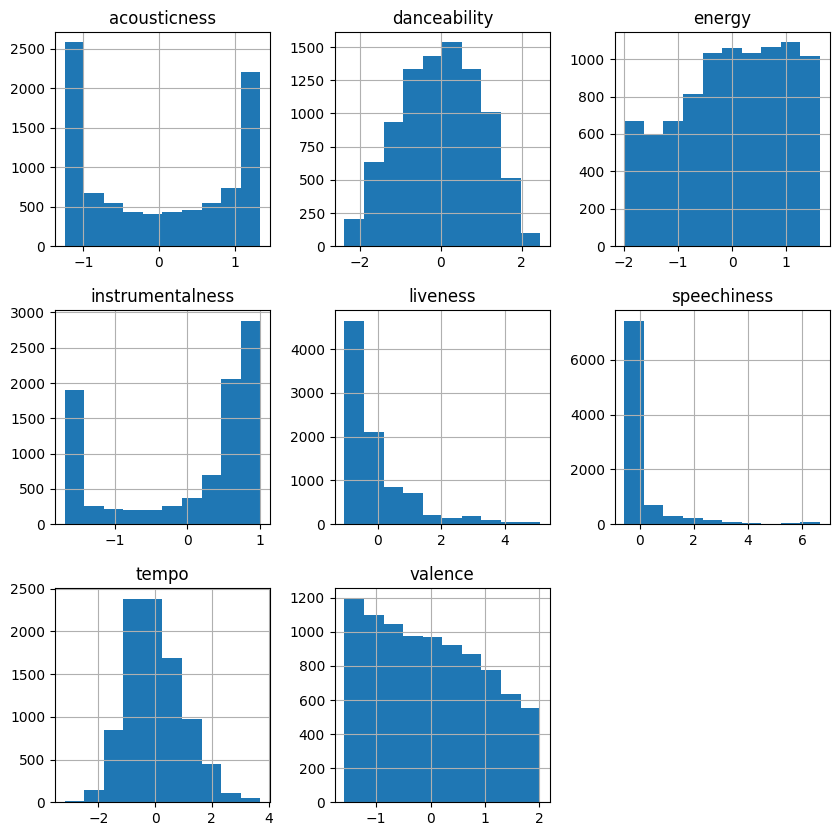

In [42]:
echonest_tracks[scaling_cols].hist(figsize=(10,10))

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

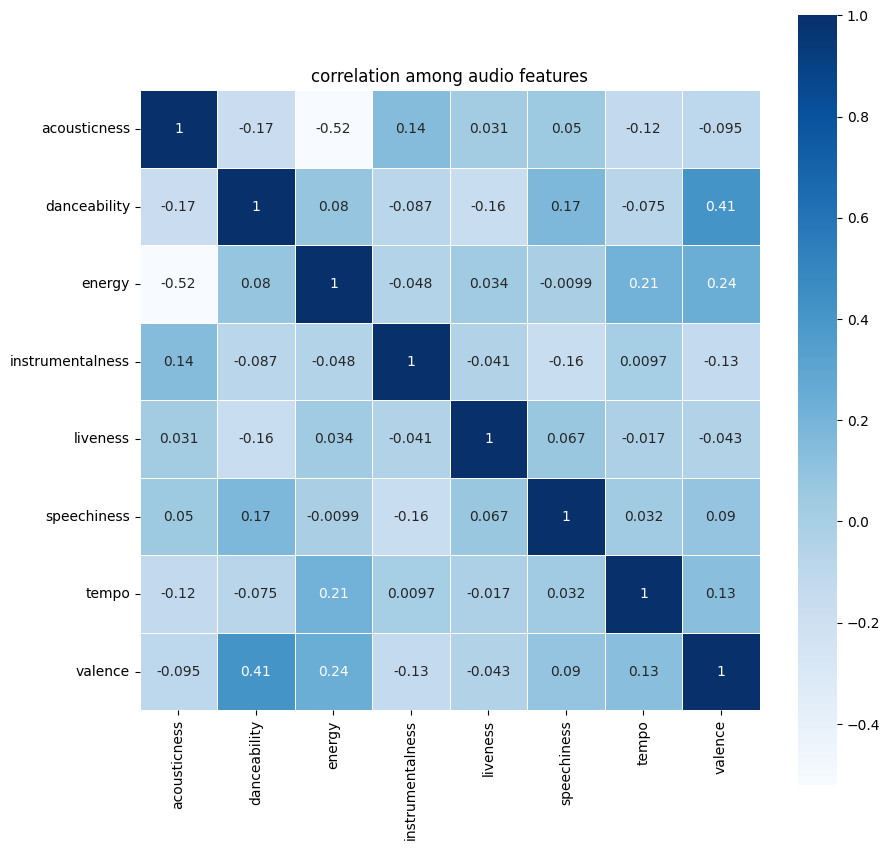

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(echonest_tracks[scaling_cols].corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("correlation among audio features")
plt.show()

#KMeans Clustering Model

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [46]:
X = echonest_tracks[scaling_cols]
kmeans = KMeans(n_clusters=7, random_state=42)
y_pred = kmeans.fit_predict(X)

In [47]:
y_pred

array([6, 6, 4, ..., 5, 0, 4], dtype=int32)

In [48]:
echonest_tracks['cluster'] = y_pred
echonest_tracks.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,date_released,album,album_id,artist_id,artist,genres_top,genres_all,track,duration,cluster
track_id,,,,,,,,,,,,,,,,,,
16117,1.214382,-0.288738,-1.560300,-1.630484,-0.244916,3.742548,-1.289333,0.658010,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Bollate centro,229,6
16118,1.076011,2.287835,-1.433823,-0.869103,-0.497787,3.447874,-0.081401,0.994746,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Mi fa,238,6
16119,1.326473,-1.048721,-1.627886,0.224370,-0.461701,-0.324836,-0.965908,0.176510,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Coma,212,4
16120,-0.216722,-0.006218,-1.395172,-1.687557,-0.469947,5.965922,0.748261,0.997488,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Capsula spaziale,197,6
16121,1.098856,-0.093101,-1.723800,0.249871,-0.690958,1.151634,0.680169,0.497194,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Confuso,194,1


In [49]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
comp_x, comp_y = zip(*X)

Text(0.5, 1.0, 'Clustering by KMeans (k=7)')

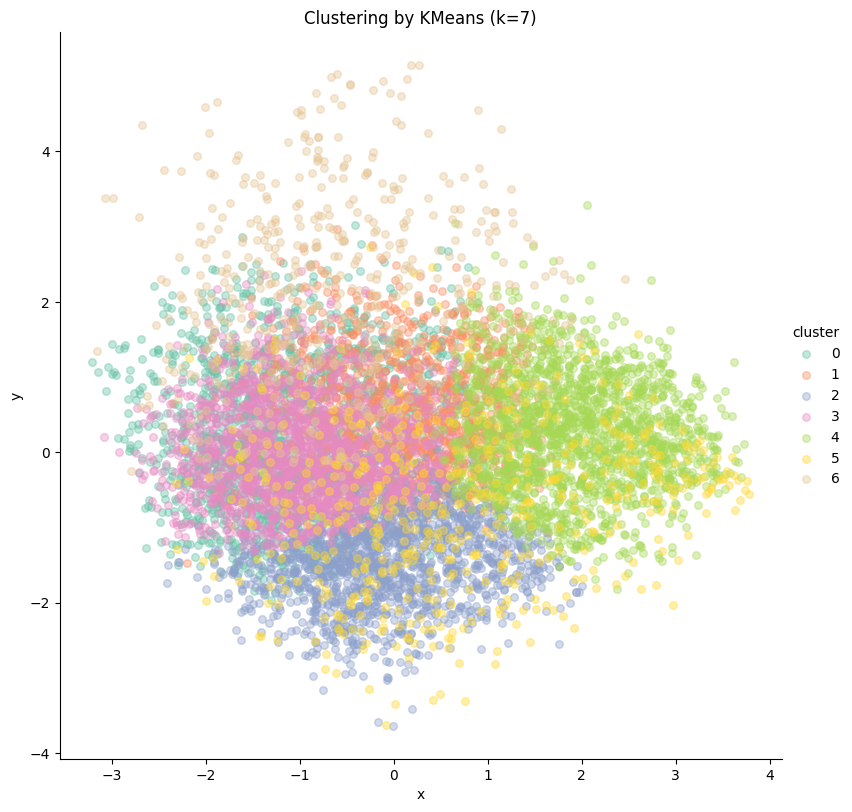

In [50]:
echonest_tracks['x'] = comp_x
echonest_tracks['y'] = comp_y
sns.lmplot(data=echonest_tracks, x='x', y='y', hue='cluster', fit_reg=False, height=8, palette='Set2', scatter_kws={'alpha':0.4, 's':30})
plt.title("Clustering by KMeans (k=7)")

We can see clearly that the clusters are not seperated, so we use k=5

In [51]:
kmeans = KMeans(n_clusters=5, random_state=0)
y_predicted = kmeans.fit_predict(X)
echonest_tracks['cluster'] = y_predicted

In [52]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
comp_x, comp_y = zip(*X)

Text(0.5, 1.0, 'Clustering by KMeans (k=5)')

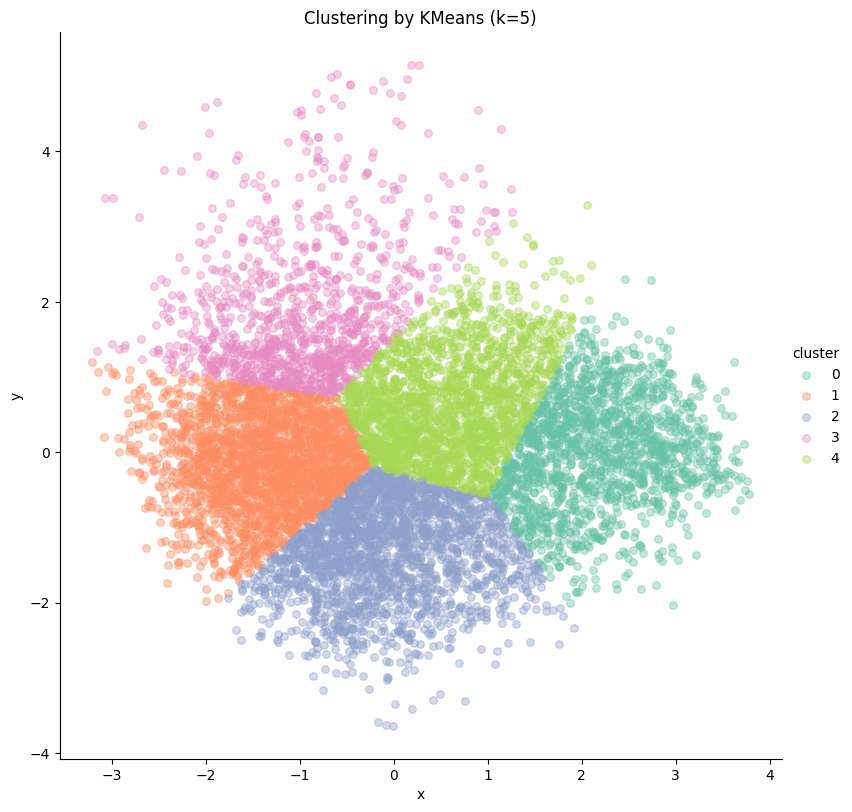

In [53]:
echonest_tracks['x'] = comp_x
echonest_tracks['y'] = comp_y
sns.lmplot(data=echonest_tracks, x='x', y='y', hue='cluster', fit_reg=False, height=8, palette='Set2', scatter_kws={'alpha':0.4, 's':30})
plt.title("Clustering by KMeans (k=5)")

This could be satisfactory output compared to that of the previous one(k=7)

#SVM Model From the result of CLustering

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [55]:
echonest_tracks.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,date_released,album,album_id,artist_id,artist,genres_top,genres_all,track,duration,cluster,x,y
track_id,,,,,,,,,,,,,,,,,,,,
16117,1.214382,-0.288738,-1.560300,-1.630484,-0.244916,3.742548,-1.289333,0.658010,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Bollate centro,229,3,0.583901,3.575563
16118,1.076011,2.287835,-1.433823,-0.869103,-0.497787,3.447874,-0.081401,0.994746,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Mi fa,238,3,-0.806139,4.193576
16119,1.326473,-1.048721,-1.627886,0.224370,-0.461701,-0.324836,-0.965908,0.176510,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Coma,212,0,2.093951,0.869956
16120,-0.216722,-0.006218,-1.395172,-1.687557,-0.469947,5.965922,0.748261,0.997488,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Capsula spaziale,197,3,-1.264809,3.574588
16121,1.098856,-0.093101,-1.723800,0.249871,-0.690958,1.151634,0.680169,0.497194,2006-02-03,Bollate centro,3694,4433,Bacco Baccanels,International,"[Europe, Jazz, Jazz: Vocal, Pop]",Confuso,194,4,0.915758,1.523525


In [76]:
X = echonest_tracks.drop(["date_released","album","artist","genres_top","genres_all","track","cluster", "x", "y"],axis=1)

In [77]:
y = echonest_tracks["cluster"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [79]:
classifier = SVC(kernel='linear')

In [80]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

#Test Accuracy

In [81]:
y_pred=classifier.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9247


#Train Accuracy

In [83]:
y_pred_train = classifier.predict(X_train)

In [84]:
from sklearn.metrics import accuracy_score
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score with default hyperparameters: 0.9286


The training-set accuracy score is 0.9286 while the test-set accuracy to be 0.9247. These two values are quite comparable. So, there is no question of overfitting.

#Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<Axes: >

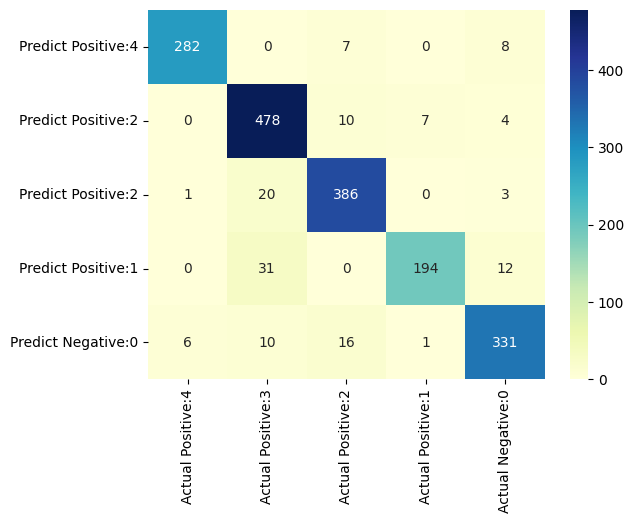

In [86]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:4','Actual Positive:3','Actual Positive:2','Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:4','Predict Positive:2','Predict Positive:2','Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       297
           1       0.89      0.96      0.92       499
           2       0.92      0.94      0.93       410
           3       0.96      0.82      0.88       237
           4       0.92      0.91      0.92       364

    accuracy                           0.92      1807
   macro avg       0.93      0.92      0.92      1807
weighted avg       0.93      0.92      0.92      1807



#Random Forest

In [88]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
import tensorflow_decision_forests as tfdf

In [90]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [91]:
model = tfdf.keras.RandomForestModel(verbose=2)

Use 2 thread(s) for training
Use /tmp/tmp2dpox4c4 as temporary training directory


In [92]:
model.compile(metrics=["accuracy"])

In [93]:
X = echonest_tracks.drop(["date_released","album","artist","genres_top","genres_all","track", "x", "y"],axis=1)

In [94]:
model.fit(tfdf.keras.pd_dataframe_to_tf_dataset(X, label="cluster"))

Reading training dataset...
Training tensor examples:
Features: {'acousticness': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'danceability': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'energy': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'instrumentalness': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'liveness': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'speechiness': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'tempo': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'valence': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'album_id': <tf.Tensor 'data_8:0' shape=(None,) dtype=int64>, 'artist_id': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'duration': <tf.Tensor 'data_10:0' shape=(None,) dtype=int64>}
Label: Tensor("data_11:0", shape=(None,), dtype=int32)
Weights: None
Normalized tensor features:
 {'acousticness': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'd

[INFO 23-05-09 03:18:39.5490 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-05-09 03:18:39.5491 UTC kernel.cc:774] Collect training examples
[INFO 23-05-09 03:18:39.5491 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-05-09 03:18:39.5493 UTC kernel.cc:393] Number of batches: 10
[INFO 23-05-09 03:18:39.5493 UTC kernel.cc:394] Number of examples: 9035
[INFO 23-05-09 03:18:39.5518 UTC kernel.cc:794] Training dataset:
Number of records: 9035
Number of columns: 12

Number of columns by type:
	NUMERICAL: 11 (91.6667%)
	CATEGORICAL: 1 (8.33333%)

Columns:

NUMERICAL: 11 (91.6667%)
	1: "acousticness" NUMERICAL mean:-2.31858e-10 min:-1.2

Model trained in 0:00:41.280955
Compiling model...
Model compiled.


In [95]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=5)